# 6주차 실습

1. DSA data를 불러와서
2. 순환 데이터 변형 (Split Sequence)
3. Transformer모델로 Classification

In [1]:
import pandas as pd
import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

## Data Load

In [2]:
df = pd.read_csv("C:/Project/DeepLearning/Data/DSA_features.csv")
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [3]:
def split_sequences(sequences, n_steps, n_features):
    X, y = list(), list()
    for i in range(len(sequences)):
        # 시퀀스의 끝점 계산
        end_ix = i + n_steps
        # 데이터 범위를 넘어서면 중단
        if end_ix > len(sequences):
            break
        # 입력 시퀀스는 n_steps 동안의 데이터 (마지막 레이블 제외)
        seq_x = sequences[i:end_ix, :n_features]
        # 출력은 end_ix 시점에서 30개의 레이블만 가져옴
        seq_y = sequences[end_ix-1, n_features:]  # 특정 시점에서 한 번에 30개의 레이블만 가져오기
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)

In [4]:
df_filtered = df.drop('people', axis=1)
df_filtered.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,6.267229e-07,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,7.403458e-07,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,5.802523e-07,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,5.398837e-07,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,6.787533e-07,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting


In [5]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 'label' 컬럼을 숫자로 변환
df_filtered['activity'] = label_encoder.fit_transform(df_filtered['activity'])

df_filtered.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,6.267229e-07,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,12
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,7.403458e-07,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,12
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,5.802523e-07,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,12
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,5.398837e-07,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,12
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,6.787533e-07,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,12


## StandardScaler

각 피쳐의 값 범위가 매우 다르기 때문에 StandardScaler를 통해 스케일을 좁혀보자.

In [6]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# 열 이름의 접두사/접미사를 사용하여 필터링
prefixes = ['T_', 'RA_', 'LA_', 'RL_', 'LL_']  # 원하는 접두사 리스트
columns_to_scale = df_filtered.columns[df_filtered.columns.str.startswith(tuple(prefixes))]

# 선택한 열을 스케일링
df_filtered[columns_to_scale] = scaler.fit_transform(df_filtered[columns_to_scale])

# 스케일링 후 데이터 확인
df_filtered.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
0,0.055870,-0.546828,0.725530,-0.393761,-0.680020,-0.428085,0.860379,-0.148110,1.180617,-0.523874,...,-0.763476,-1.258551,0.441264,-0.350861,-0.623732,-0.017723,-0.400560,-0.913563,0.204309,12
1,0.056545,-0.545491,0.754858,-0.393913,-0.689658,0.321260,0.886595,-0.141000,1.195850,-0.524238,...,-0.763471,-1.257727,-0.439297,-0.351291,-0.623682,-0.018691,-0.400558,-0.913325,0.705828,12
2,0.054587,-0.553129,0.754823,-0.394011,-0.698774,-0.266880,0.886639,-0.141024,1.201248,-0.524308,...,-0.763478,-1.258909,-0.149907,-0.350716,-0.623032,-0.017234,-0.400562,-0.914056,0.218593,12
3,0.045943,-0.551243,0.726917,-0.393997,-0.697102,-0.699580,0.897675,-0.116077,1.201022,-0.523883,...,-0.763479,-1.259232,0.145985,-0.348852,-0.620142,-0.015135,-0.400553,-0.912443,0.533490,12
4,0.038098,-0.549365,0.752191,-0.394041,-0.702816,2.260389,0.907779,-0.130346,1.204990,-0.524269,...,-0.763474,-1.258165,-0.176094,-0.347060,-0.619151,-0.013759,-0.400559,-0.913492,0.562119,12


In [7]:
df_filtered['activity'].value_counts()

12    480
18    480
6     480
10    480
4     480
3     480
2     480
15    480
11    480
17    480
13    480
16    480
9     480
14    480
5     480
0     480
8     480
7     480
1     480
Name: activity, dtype: int64

In [8]:
X=df_filtered.drop(['activity'], axis=1)

X.head()
# head()는 첫 5행만 출력함.

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_min,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew
0,0.055870,-0.546828,0.725530,-0.393761,-0.680020,-0.428085,0.860379,-0.148110,1.180617,-0.523874,...,0.519750,-0.763476,-1.258551,0.441264,-0.350861,-0.623732,-0.017723,-0.400560,-0.913563,0.204309
1,0.056545,-0.545491,0.754858,-0.393913,-0.689658,0.321260,0.886595,-0.141000,1.195850,-0.524238,...,0.519916,-0.763471,-1.257727,-0.439297,-0.351291,-0.623682,-0.018691,-0.400558,-0.913325,0.705828
2,0.054587,-0.553129,0.754823,-0.394011,-0.698774,-0.266880,0.886639,-0.141024,1.201248,-0.524308,...,0.522510,-0.763478,-1.258909,-0.149907,-0.350716,-0.623032,-0.017234,-0.400562,-0.914056,0.218593
3,0.045943,-0.551243,0.726917,-0.393997,-0.697102,-0.699580,0.897675,-0.116077,1.201022,-0.523883,...,0.523062,-0.763479,-1.259232,0.145985,-0.348852,-0.620142,-0.015135,-0.400553,-0.912443,0.533490
4,0.038098,-0.549365,0.752191,-0.394041,-0.702816,2.260389,0.907779,-0.130346,1.204990,-0.524269,...,0.521765,-0.763474,-1.258165,-0.176094,-0.347060,-0.619151,-0.013759,-0.400559,-0.913492,0.562119


In [9]:
y=df_filtered['activity']
y.value_counts()

12    480
18    480
6     480
10    480
4     480
3     480
2     480
15    480
11    480
17    480
13    480
16    480
9     480
14    480
5     480
0     480
8     480
7     480
1     480
Name: activity, dtype: int64

In [10]:
#one hot encoding 하기

y = pd.get_dummies(y).values
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값
X_train

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_min,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew
3482,0.419664,-0.267410,0.857712,-0.390597,-0.599402,1.766596,0.482579,0.143300,0.265497,0.011474,...,-1.464914,-0.601034,-0.523085,0.232655,0.164311,0.185977,0.191275,-0.180076,0.084982,-0.048766
5048,0.289253,-0.130556,0.213787,-0.261283,-0.001363,-0.372821,0.436366,0.152278,0.322950,-0.294576,...,-0.289184,1.336399,1.410150,-0.814559,0.074818,-0.022785,-0.026008,-0.196340,0.046971,-1.477950
8682,0.444226,0.915389,-2.387490,0.204361,0.799904,-0.827652,0.043703,1.562785,-2.802558,2.130162,...,0.241955,0.383108,0.710981,-1.315558,-0.538672,0.228596,-1.480582,1.839287,2.296963,-0.709158
85,0.496390,-0.415049,1.058778,-0.394059,-0.705942,-0.459722,-0.045746,-0.608613,0.669579,-0.523371,...,1.269129,-0.763475,-1.258426,0.286603,1.653274,1.306226,1.911123,-0.400556,-0.912833,-0.056411
4265,0.538101,-0.008419,0.135068,-0.261913,-0.003057,-0.541621,0.121592,0.302675,0.079200,-0.170676,...,-2.371487,0.405519,0.730228,-0.567322,-0.073746,-0.004433,-0.195205,-0.131990,0.189819,-0.729581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,0.448697,-0.124381,0.328237,-0.307457,-0.138625,-0.462540,0.429048,0.118952,0.069884,-0.128048,...,0.357864,0.096386,0.445775,0.001467,0.274422,0.274102,0.428105,-0.309710,-0.277118,1.695668
7891,0.079846,-0.287456,-0.615208,-0.257268,0.009345,-1.447639,0.592660,0.114140,0.305071,-0.256926,...,1.806422,-0.533621,-0.381912,0.502539,-0.212061,-0.170021,-0.120088,-0.231851,-0.041680,0.676274
4859,0.407423,0.029474,0.181631,-0.247453,0.034875,-0.042758,0.554886,0.498584,0.363278,-0.156013,...,0.479237,0.124998,0.474054,-1.003366,0.144897,0.166931,0.271166,-0.325120,-0.334718,0.993850
3264,0.077620,-0.529928,0.708385,-0.392884,-0.647255,-1.301710,-0.200471,-0.681803,0.576770,-0.523078,...,-0.962090,-0.469174,-0.265364,0.052740,0.519024,0.595645,0.377782,0.188570,0.726753,-0.505567


## Build the model

In [12]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(res)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    return x + res

In [13]:
def build_model(
    input_shape,
    n_outputs,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks, # 해당 파라미터 값을 변경하여 적용한다.
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_last")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(n_outputs, activation="softmax")(x)
    return keras.Model(inputs, outputs)

In [14]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array = np.array(y_train)
# np.c_ : 배열을 열 방향으로 이어붙인다.
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

print(test_set)

[[ 0.06956998 -0.33279226  0.28423533 ...  0.          0.
   0.        ]
 [ 0.49655011  0.00562165  0.46909816 ...  0.          1.
   0.        ]
 [ 0.08805305 -0.43553441  0.55706541 ...  0.          0.
   0.        ]
 ...
 [ 0.11132853  0.94972965 -0.48450524 ...  0.          0.
   0.        ]
 [ 0.15083931 -0.07946817  0.10737598 ...  0.          0.
   1.        ]
 [ 0.51992305 -0.01789223  0.25648989 ...  1.          0.
   0.        ]]


In [15]:
# Apply sequence transformation using time step of 25 for both train and test data
# All sensing modalities are recorded at a sampling rate of 50 Hz, which is considered sufficient for capturing human activity.

X_train, y_train = split_sequences(train_set, 5, X_test.shape[1])
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 5, X_test.shape[1])
print(X_test.shape, y_test.shape)

(6836, 5, 270) (6836, 19)
(2276, 5, 270) (2276, 19)


In [16]:
n_classes = len(np.unique(y_train))

idx = np.random.permutation(len(X_train))
X_train = X_train[idx]
y_train = y_train[idx]

y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

n_classes

2

In [17]:
# 각각 스텝 수, feature 수, label 수
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
print(n_timesteps, n_features, n_outputs)

5 270 19


In [18]:
input_shape = X_train.shape[1:]
input_shape

(5, 270)

In [19]:

model = build_model(
    input_shape,
    n_outputs,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)


model.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["accuracy"],
)
model.summary()

# callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

model_history=model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=150,
    batch_size=64,
#    callbacks=callbacks,
)

y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1) # 배열에서 최댓값을 가지는 원소의 인덱스를 반환하는 함수
y_pred_class = np.argmax(y_pred, axis=1)

model.evaluate(X_test, y_test, verbose=1)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 5, 270)]             0         []                            
                                                                                                  
 multi_head_attention (Mult  (None, 5, 270)               1109262   ['input_1[0][0]',             
 iHeadAttention)                                                     'input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 5, 270)               0         ['multi_head_attention[0][0]']
                                                                                                  
 layer_normalization (Layer  (None, 5, 270)               540       ['dropout[0][0]']        

[3.1181764602661133, 0.24472759664058685]

## Evaluate

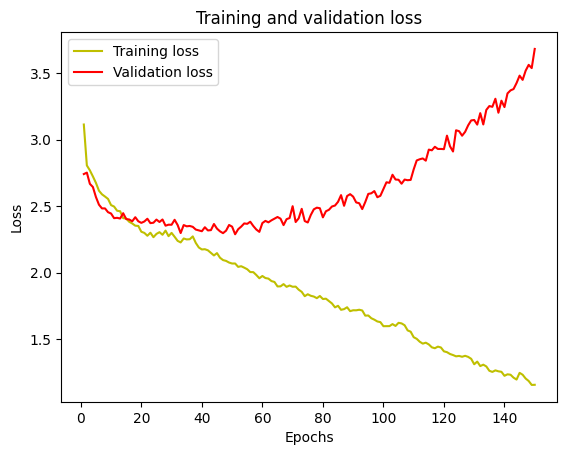

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix

# 훈련 손실(training loss)과 검증 손실(validation loss) 추출
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

# 에포크(epoch) 범위 생성
epochs = range(1, len(loss) + 1)

# 훈련 손실(training loss)과 검증 손실(validation loss) 시각화
plt.plot(epochs, loss, 'y', label='Training loss')  # 훈련 손실을 노란색(yellow)으로 플롯
plt.plot(epochs, val_loss, 'r', label='Validation loss')  # 검증 손실을 빨간색(red)으로 플롯
plt.title('Training and validation loss')  # 그래프 제목 설정
plt.xlabel('Epochs')  # x축 레이블 설정
plt.ylabel('Loss')  # y축 레이블 설정
plt.legend()  # 범례(legend) 표시
plt.show()  # 그래프 출력

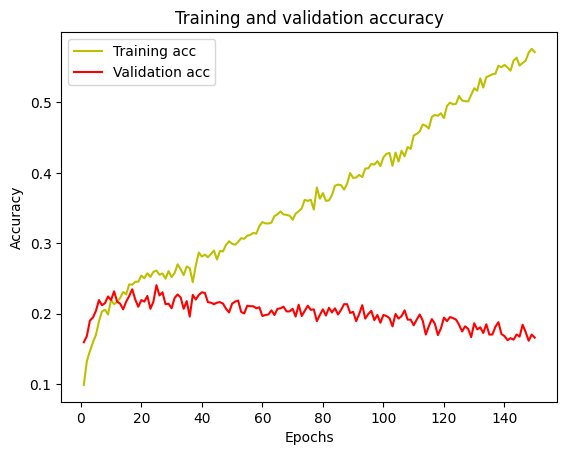

In [21]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
print("\n----------------classification_report-----------------")
print(classification_report(y_test_class, y_pred_class))
print("\n------------------confusion_matrix--------------------")
print(confusion_matrix(y_test_class, y_pred_class))


----------------classification_report-----------------
              precision    recall  f1-score   support

           0       0.26      0.30      0.28       118
           1       0.26      0.25      0.26       124
           2       0.27      0.28      0.27       119
           3       0.18      0.15      0.17       118
           4       0.23      0.23      0.23       126
           5       0.29      0.18      0.22       130
           6       0.30      0.30      0.30       130
           7       0.27      0.16      0.20       126
           8       0.29      0.25      0.27       120
           9       0.19      0.18      0.19       127
          10       0.28      0.35      0.31       113
          11       0.23      0.23      0.23       122
          12       0.27      0.27      0.27       127
          13       0.29      0.24      0.26       112
          14       0.11      0.09      0.10       113
          15       0.25      0.35      0.29       116
          16       0.23  